In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("class_practice.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
categorical_columns = list(df.dtypes[df.dtypes == "str"].index)
for c in categorical_columns:
    df[c] = df[c].str.strip().str.lower().str.replace(" ", "_")

In [6]:
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.5,no
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.9,no
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,no
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.6,yes


In [7]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [8]:
df.totalcharges # is string but has to be float

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: str

In [9]:
tc = pd.to_numeric(df.totalcharges, errors="coerce") # tries to convert to numeric and replaces

In [10]:
df[tc.isnull() == True].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
customerid,4472-lvygi,3115-czmzd,5709-lvoeq,4367-nuyao,1371-dwpaz,7644-omvmy,3213-vvolg,2520-sgtta,2923-arzlg,4075-wkniu,2775-sefee
gender,female,male,female,male,female,male,male,female,male,female,male
seniorcitizen,0,0,0,0,0,0,0,0,0,0,0
partner,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,no
dependents,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
tenure,0,0,0,0,0,0,0,0,0,0,0
phoneservice,no,yes,yes,yes,no,yes,yes,yes,yes,yes,yes
multiplelines,no_phone_service,no,no,yes,no_phone_service,no,yes,no,no,yes,yes
internetservice,dsl,no,dsl,no,dsl,no,no,no,no,dsl,dsl
onlinesecurity,yes,no_internet_service,yes,no_internet_service,yes,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no,yes


In [11]:
df.totalcharges = tc
df[df.totalcharges.isnull() == True].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
customerid,4472-lvygi,3115-czmzd,5709-lvoeq,4367-nuyao,1371-dwpaz,7644-omvmy,3213-vvolg,2520-sgtta,2923-arzlg,4075-wkniu,2775-sefee
gender,female,male,female,male,female,male,male,female,male,female,male
seniorcitizen,0,0,0,0,0,0,0,0,0,0,0
partner,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,no
dependents,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
tenure,0,0,0,0,0,0,0,0,0,0,0
phoneservice,no,yes,yes,yes,no,yes,yes,yes,yes,yes,yes
multiplelines,no_phone_service,no,no,yes,no_phone_service,no,yes,no,no,yes,yes
internetservice,dsl,no,dsl,no,dsl,no,no,no,no,dsl,dsl
onlinesecurity,yes,no_internet_service,yes,no_internet_service,yes,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no,yes


In [12]:
df.totalcharges = df.totalcharges.fillna(0)
### Since total charges are 0, but monthly charges are up so we make zero total equal to 1 month of payment
# total_values = df.monthlycharges[df.totalcharges.isnull() == True]
# df.totalcharges[df.totalcharges.isnull() == True] = total_values

In [13]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: str

In [14]:
df.churn == "yes"

0       False
1       False
2        True
3       False
4        True
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: churn, Length: 7043, dtype: bool

In [15]:
df.churn = (df.churn == "yes").astype(int)

In [16]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [19]:
len(df_full_train), len(df_test)

(5634, 1409)

In [20]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1) # 20% of df is 25% of df_full_train

In [21]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [24]:
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]

In [25]:
df_full_train.reset_index(drop=True, inplace=True)

In [26]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [27]:
df_full_train.churn

0       0
1       1
2       0
3       0
4       0
       ..
5629    1
5630    0
5631    1
5632    1
5633    0
Name: churn, Length: 5634, dtype: int64

In [28]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [29]:
df_full_train.churn.value_counts(normalize=True)  # Churn rate is ~27%

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [30]:
global_churn_rate = df_full_train.churn.mean() # Same as normalize because 1/n*sum(xi) -> 1/n*sum(xi=1)

In [31]:
global_churn_rate.round(2)

np.float64(0.27)

In [32]:
df_full_train.dtypes[df_full_train.dtypes != "str"]

seniorcitizen       int64
tenure              int64
monthlycharges    float64
totalcharges      float64
churn               int64
dtype: object

In [33]:
numerical = ["tenure", "monthlycharges", "totalcharges"]

In [34]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='str')

In [35]:
categorical = [l for l in df_full_train.columns if l not in numerical + ["churn", "customerid"]]
categorical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [36]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [37]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [38]:
churn_female = df_full_train[df_full_train.gender == "female"].churn.mean()

In [39]:
churn_male = df_full_train[df_full_train.gender == "male"].churn.mean()

In [40]:
global_churn_rate, churn_female, churn_male

(np.float64(0.26996805111821087),
 np.float64(0.27682403433476394),
 np.float64(0.2632135306553911))

In [41]:
churn_yes_partner = df_full_train[df_full_train.partner == "yes"].churn.mean()

In [42]:
churn_no_partner = df_full_train[df_full_train.partner == "no"].churn.mean()

In [43]:
global_churn_rate, churn_yes_partner, churn_no_partner

(np.float64(0.26996805111821087),
 np.float64(0.20503330866025166),
 np.float64(0.3298090040927694))

In [44]:
churn_no_partner / global_churn_rate

np.float64(1.2216593879412643)

In [45]:
churn_yes_partner / global_churn_rate

np.float64(0.7594724924338315)

In [46]:
df_full_train.groupby("gender").churn.mean()  # Create a series

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [47]:
from IPython.display import display
for cat in categorical:
    print(cat)
    df_group = df_full_train.groupby(cat).churn.agg(["mean", "count"])  # Create a dataframe
    df_group["diff"] = df_group["mean"] - global_churn_rate
    df_group["risk"] = df_group["mean"] / global_churn_rate
    display(df_group)


gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


In [48]:
from sklearn.metrics import mutual_info_score

In [49]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [50]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [51]:
mutual_info_score(df_full_train.churn, df_full_train.paymentmethod)

0.043210027531582915

In [52]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [53]:
mutual_info_score(df_full_train.churn, df_full_train.dependents)

0.012345815445534689

In [54]:
def mutual_info_churn_score(series):
    return mutual_info_score(df_full_train.churn, series)

In [55]:
mi = df_full_train[categorical].apply(mutual_info_churn_score).sort_values(ascending=False)

In [56]:
mi

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In [57]:
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


In [58]:
df_full_train[numerical].corrwith(df_full_train.churn)
# tenure up - churn down
# monthly up - churn up
# total up - churn down

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [59]:
df_full_train[df_full_train.tenure <= 2].churn.mean()  # 59% to leave for customers with only 2 months of services usage

np.float64(0.5953420669577875)

In [60]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure < 12)].churn.mean()  # 40% to leave for customers between two months and one year of services usage

np.float64(0.4059003051881994)

In [61]:
df_full_train[df_full_train.tenure >= 12].churn.mean()  # 17% to leave for customers with at least one year of services usage

np.float64(0.17986881937436933)

In [62]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()  # 8% to leave for customers with only 20$ of monthly charges

np.float64(0.08795411089866156)

In [63]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges < 50)].churn.mean()  # 18% to leave for customers between 20$ and 50$ of monthly charges

np.float64(0.1836890243902439)

In [64]:
df_full_train[df_full_train.monthlycharges >= 50].churn.mean()  # 32% to leave for customers with more than 50$ of monthly charges

np.float64(0.3248223216635957)

In [65]:
df_full_train.monthlycharges.describe()

count    5634.000000
mean       64.779127
std        30.104993
min        18.250000
25%        35.400000
50%        70.375000
75%        89.850000
max       118.650000
Name: monthlycharges, dtype: float64

In [66]:
df_full_train.tenure.describe()

count    5634.000000
mean       32.277955
std        24.555211
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [67]:
#One hot encoding
from sklearn.feature_extraction import DictVectorizer

In [68]:
df_train[["gender", "contract"]].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [69]:
g_c_dict = df_train[["gender", "contract"]].iloc[:100].to_dict(orient="records")
g_c_dict

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

In [70]:
dv = DictVectorizer(sparse=False)

In [71]:
dv.fit(g_c_dict)

,"dtype dtype: dtype, default=np.float64The type of feature values. Passed to Numpy array/scipy.sparse matrixconstructors as the dtype argument.",<class 'numpy.float64'>
,"separator separator: str, default=""=""Separator string used when constructing new features for one-hotcoding.",'='
,"sparse sparse: bool, default=TrueWhether transform should produce scipy.sparse matrices.",False
,"sort sort: bool, default=TrueWhether ``feature_names_`` and ``vocabulary_`` should besorted when fitting.",True


In [72]:
dv.transform(g_c_dict)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

In [73]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [74]:
train_dicts = df_train[categorical + numerical].to_dict(orient="records")

In [75]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [76]:
dv = DictVectorizer(sparse=False)

In [77]:
X_train = dv.fit_transform(train_dicts)
X_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]], shape=(4225, 45))

In [78]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [79]:
val_dicts = df_val[categorical + numerical].to_dict(orient="records")

In [80]:
X_val = dv.transform(val_dicts)

In [81]:
X_val

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.1000e+01,
        4.9734e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0750e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0350e+01],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.8000e+01,
        1.0581e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        9.3300e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        2.9285e+02]], shape=(1409, 45))

In [82]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [83]:
z = np.linspace(-10, 10, 100)

In [84]:
z

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [85]:
sigmoid(z)

array([4.53978687e-05, 5.55606489e-05, 6.79983174e-05, 8.32200197e-05,
       1.01848815e-04, 1.24647146e-04, 1.52547986e-04, 1.86692945e-04,
       2.28478855e-04, 2.79614739e-04, 3.42191434e-04, 4.18766684e-04,
       5.12469082e-04, 6.27124987e-04, 7.67413430e-04, 9.39055039e-04,
       1.14904229e-03, 1.40591988e-03, 1.72012560e-03, 2.10440443e-03,
       2.57431039e-03, 3.14881358e-03, 3.85103236e-03, 4.70911357e-03,
       5.75728612e-03, 7.03711536e-03, 8.59898661e-03, 1.05038445e-02,
       1.28252101e-02, 1.56514861e-02, 1.90885420e-02, 2.32625358e-02,
       2.83228820e-02, 3.44451957e-02, 4.18339400e-02, 5.07243606e-02,
       6.13831074e-02, 7.41067363e-02, 8.92170603e-02, 1.07052146e-01,
       1.27951705e-01, 1.52235823e-01, 1.80176593e-01, 2.11963334e-01,
       2.47663801e-01, 2.87185901e-01, 3.30246430e-01, 3.76354517e-01,
       4.24816868e-01, 4.74768924e-01, 5.25231076e-01, 5.75183132e-01,
       6.23645483e-01, 6.69753570e-01, 7.12814099e-01, 7.52336199e-01,
      

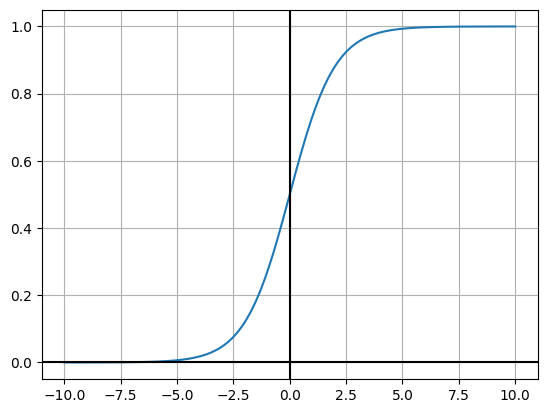

In [86]:
plt.plot(z, sigmoid(z))
plt.grid(axis="both")
plt.axhline(0, color='black')
plt.axvline(0, color='black')

In [87]:
sigmoid(10000)

np.float64(1.0)

In [88]:
# def linear_regression(xi):
#     result = w0
#     for j in range(len(w)):
#         result += xi[j] * w[j]
#     return result

In [89]:
# def logistic_regression(xi):
#     score = w0
#     for j in range(len(w)):
#         score += xi[j] * w[j]
#     result = sigmoid(score)
#     return result

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
model = LogisticRegression(max_iter=100)

In [92]:
model.fit(X_train, y_train)

D:\PyProjects\machine-learning-zoomcamp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [93]:
model.coef_[0].round(3) # weights

array([ 0.476, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.336,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.059, -0.087, -0.032,  0.07 , -0.059,  0.142,
       -0.25 ,  0.216, -0.121, -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [94]:
model.intercept_[0].round(3) # biased

np.float64(-0.109)

In [95]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [96]:
model.predict_proba(X_train)
# First column is probability of false
# Second column is probability of true

array([[0.90452492, 0.09547508],
       [0.32058285, 0.67941715],
       [0.36630247, 0.63369753],
       ...,
       [0.46766799, 0.53233201],
       [0.95761329, 0.04238671],
       [0.3012034 , 0.6987966 ]], shape=(4225, 2))

In [97]:
y_pred = model.predict_proba(X_val)[:, 1]

In [98]:
churn_decision = (y_pred >= 0.5)

In [99]:
churn_decision

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [100]:
df_val[churn_decision].customerid  # Shows list of people whose probability to churn is >=50%

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 312, dtype: str

In [101]:
y_val

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [102]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [103]:
(y_val == churn_decision).mean()  # shows the % of predictions that match

np.float64(0.8026969481902059)

In [104]:
df_pred = pd.DataFrame()

In [105]:
df_pred["probability"] = y_pred

In [106]:
df_pred["prediction"] = churn_decision.astype(int)

In [107]:
df_pred["actual"] = y_val

In [108]:
df_pred

,probability,prediction,actual
0,0.008968,0,0
1,0.204542,0,0
2,0.212152,0,0
3,0.543024,1,1
4,0.213658,0,0
...,...,...,...
1404,0.313711,0,0
1405,0.039280,0,1
1406,0.136322,0,0
1407,0.799954,1,1


In [109]:
df_pred["correct"] = df_pred.prediction == df_pred.actual

In [110]:
df_pred

,probability,prediction,actual,correct
0,0.008968,0,0,True
1,0.204542,0,0,True
2,0.212152,0,0,True
3,0.543024,1,1,True
4,0.213658,0,0,True
...,...,...,...,...
1404,0.313711,0,0,True
1405,0.039280,0,1,False
1406,0.136322,0,0,True
1407,0.799954,1,1,True


In [111]:
df_pred.correct.mean()

np.float64(0.8026969481902059)

In [112]:
df_pred[(df_pred.correct == False) & (df_pred.probability <= 0.3)]

,probability,prediction,actual,correct
14,0.065819,0,1,False
22,0.247362,0,1,False
27,0.212016,0,1,False
36,0.150517,0,1,False
46,0.142276,0,1,False
...,...,...,...,...
1358,0.227550,0,1,False
1359,0.299394,0,1,False
1370,0.280188,0,1,False
1380,0.182468,0,1,False


In [113]:
dv.get_feature_names_out() # every feature

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [114]:
model.coef_[0].round(3) # weights of features

array([ 0.476, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.336,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.059, -0.087, -0.032,  0.07 , -0.059,  0.142,
       -0.25 ,  0.216, -0.121, -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [115]:
a = [1,2,3,4]
b = "abcd"
dict(zip(a,b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [116]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.476),
 'contract=one_year': np.float64(-0.175),
 'contract=two_year': np.float64(-0.408),
 'dependents=no': np.float64(-0.03),
 'dependents=yes': np.float64(-0.078),
 'deviceprotection=no': np.float64(0.063),
 'deviceprotection=no_internet_service': np.float64(-0.089),
 'deviceprotection=yes': np.float64(-0.081),
 'gender=female': np.float64(-0.034),
 'gender=male': np.float64(-0.073),
 'internetservice=dsl': np.float64(-0.336),
 'internetservice=fiber_optic': np.float64(0.317),
 'internetservice=no': np.float64(-0.089),
 'monthlycharges': np.float64(0.004),
 'multiplelines=no': np.float64(-0.258),
 'multiplelines=no_phone_service': np.float64(0.142),
 'multiplelines=yes': np.float64(0.009),
 'onlinebackup=no': np.float64(0.063),
 'onlinebackup=no_internet_service': np.float64(-0.089),
 'onlinebackup=yes': np.float64(-0.081),
 'onlinesecurity=no': np.float64(0.266),
 'onlinesecurity=no_internet_service': np.float64(-0.089),
 'onlinesecurity=yes'

In [117]:
small = ["contract", "tenure", "monthlycharges"] # train a smaller model in order to find best suited features

In [118]:
df_train[small].iloc[:10].to_dict(orient="records")

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [119]:
dicts_train_small = df_train[small].to_dict(orient="records")
dicts_val_small = df_val[small].to_dict(orient="records")

In [120]:
dv_small = DictVectorizer(sparse=False)

In [121]:
dv_small.fit(dicts_train_small)

,"dtype dtype: dtype, default=np.float64The type of feature values. Passed to Numpy array/scipy.sparse matrixconstructors as the dtype argument.",<class 'numpy.float64'>
,"separator separator: str, default=""=""Separator string used when constructing new features for one-hotcoding.",'='
,"sparse sparse: bool, default=TrueWhether transform should produce scipy.sparse matrices.",False
,"sort sort: bool, default=TrueWhether ``feature_names_`` and ``vocabulary_`` should besorted when fitting.",True


In [122]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [123]:
X_train_small = dv_small.transform(dicts_train_small)
X_train_small

array([[  0.  ,   0.  ,   1.  , 115.5 ,  72.  ],
       [  1.  ,   0.  ,   0.  ,  95.25,  10.  ],
       [  1.  ,   0.  ,   0.  ,  75.55,   5.  ],
       ...,
       [  1.  ,   0.  ,   0.  ,  90.  ,   2.  ],
       [  0.  ,   0.  ,   1.  ,  24.5 ,  27.  ],
       [  1.  ,   0.  ,   0.  ,  80.85,   9.  ]], shape=(4225, 5))

In [124]:
model_small = LogisticRegression()

In [125]:
model_small.fit(X_train_small, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [126]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.477957596026966)

In [127]:
w = model_small.coef_[0]

In [128]:
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [129]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [130]:
# the probability of customer with month-to-month contract with monthly charges of 50$ and tenure of 5 months is
# p = w0 + w1x1 + ... + wnxn
# p = -2.47 + 1 * 0.971 + 0 * (-0.024) + 0 * (-0.948) + 50 * 0.027 + 5 * (-0.036)
# p = -2.47 + 1 * 0.971 + 50 * 0.027 + 5 * (-0.036)
# p = -0.329

In [131]:
sigmoid(-2.47)

np.float64(0.07798823512936635)

In [132]:
sigmoid(-2.47 + 0.971)

np.float64(0.18257471762614302)

In [133]:
sigmoid(-2.47 + 0.971 + 50 * 0.027)

np.float64(0.4628187629475805)

In [134]:
sigmoid(-2.47 + 0.971 + 50 * 0.027 + 5 * (-0.036))

np.float64(0.41848395843712505)

In [135]:
sigmoid(-0.329) # or sigmoid(_) <- underscore takes previous output and stores it as variable

np.float64(0.41848395843712505)

In [136]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [137]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient="records")

In [138]:
dicts_full_train

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [139]:
dv = DictVectorizer(sparse=False)

In [140]:
X_full_train = dv.fit_transform(dicts_full_train)

In [141]:
X_full_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.20000e+01, 2.58350e+02],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        4.20000e+01, 3.16055e+03],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.10000e+01, 4.68175e+03],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.80000e+01, 2.97950e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.00000e+00, 1.14100e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.60000e+01, 1.11485e+03]], shape=(5634, 45))

In [142]:
y_full_train = df_full_train.churn.values

In [143]:
model = LogisticRegression(max_iter=100)

In [144]:
model.fit(X_full_train, y_full_train)

D:\PyProjects\machine-learning-zoomcamp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [145]:
dicts_test = df_test[categorical + numerical].to_dict(orient="records")
dicts_test

[{'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'no',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'bank_transfer_(automatic)',
  'tenure': 41,
  'monthlycharges': 79.85,
  'totalcharges': 3320.75},
 {'gender': 'female',
  'seniorcitizen': 1,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'no',
  'deviceprotection': 'no',
  'techsupport': 'no',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'bank_transfer_(automatic)',
  'tenure': 66,
  'monthlycharges': 102.4,
  'totalcharges': 6471.85},
 {'gend

In [146]:
X_test = dv.transform(dicts_test)

In [147]:
y_pred = model.predict_proba(X_test)[:, 1]

In [148]:
y_pred >= 0.5

array([False, False, False, ..., False, False,  True], shape=(1409,))

In [149]:
churn_decision = (y_pred >= 0.5)

In [150]:
(churn_decision == y_test).mean()

np.float64(0.8140525195173882)

In [151]:
customer = dicts_test[10]

In [152]:
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [153]:
X_customer = dv.transform([customer])

In [154]:
X_customer.shape

(1, 45)

In [155]:
model.predict_proba(X_customer)[0, 1] # probability of churn is 49,7%

np.float64(0.4965472633435293)

In [156]:
y_test[10]

np.int64(0)

In [157]:
customer = dicts_test[-1]
X_customer = dv.transform([customer])
model.predict_proba(X_customer)[0, 1] # probability of churn is 66%

np.float64(0.6584201121103557)